In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/loan_data_train.csv')
df_test = pd.read_csv('data/loan_data_test.csv')

In [3]:
df_train.shape

(2200, 15)

In [4]:
df_test.shape

(300, 14)

In [5]:
df_train = df_train.append(df_test, ignore_index=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

In [7]:
df_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [8]:
df_train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [9]:
# Converting To be Numeric to Numeric

In [10]:
def check_non_int_vals(df):
    cols = []
    for val in df:
        try:
            float(val)
        except ValueError:
            cols.append(val)
    return cols

In [11]:
can_be_num_cols = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance']

In [12]:
for col in can_be_num_cols:
    print(col, ' = ', check_non_int_vals(df_train[col]))

Amount.Requested  =  ['.', '.', '.', '.']
Amount.Funded.By.Investors  =  ['.', '.', '.', '.']
Open.CREDIT.Lines  =  ['.', '.', '.', '.', '.']
Revolving.CREDIT.Balance  =  ['.', '.']


In [13]:
for col in can_be_num_cols:
    df_train[col] = (np.where(df_train[col]=='.', np.nan, df_train[col])).astype(float)

In [14]:
def remove_percent(df):
    df = df.str.split('%').str[0].astype(float)
    return df
    
cols = ['Interest.Rate', 'Debt.To.Income.Ratio']
for col in cols:
    df_train[col] = remove_percent(df_train[col])

In [15]:
loan_length_map = {'36 months': 0, '60 months': 1}
df_train['Loan.Length'] = df_train['Loan.Length'].map(loan_length_map)

In [16]:
df_train['FICO.Range'] = (df_train['FICO.Range'].str.split('-').str[0].astype(int)+df_train['FICO.Range'].str.split('-').str[1].astype(int))//2

In [17]:
df_train['Employment.Length'] = df_train['Employment.Length'].replace({'10+ years': '10', '< 1 year': '0', '.': np.NaN}).str.split(' ').str[0].astype(float)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2495 non-null   float64
 2   Amount.Funded.By.Investors      2495 non-null   float64
 3   Interest.Rate                   2200 non-null   float64
 4   Loan.Length                     2498 non-null   float64
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   float64
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   int32  
 11  Open.CREDIT.Lines               2491 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [19]:
df_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000.0,25000.00,18.49,1.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722,11.0,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,1.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712,14.0,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,0.0,major_purchase,3.50,LA,OWN,1000.00,692,13.0,893.0,1.0,0.0
3,80167.0,28000.0,28000.00,16.29,0.0,credit_card,19.62,NV,MORTGAGE,7083.33,712,12.0,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,1.0,credit_card,23.79,OH,MORTGAGE,5833.33,732,6.0,31061.0,2.0,10.0


In [20]:
df_train['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [21]:
# Converting Categorical Columns to Numeric

In [22]:
obj_cols = [feature for feature in df_train.columns if df_train[feature].dtype=='O']

In [23]:
obj_cols

['Loan.Purpose', 'State', 'Home.Ownership']

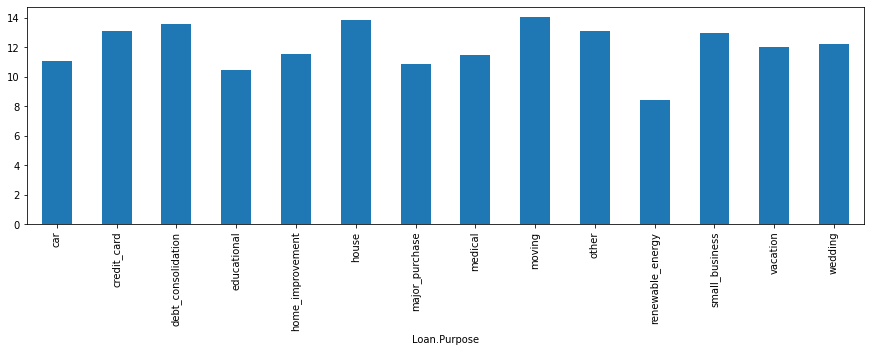

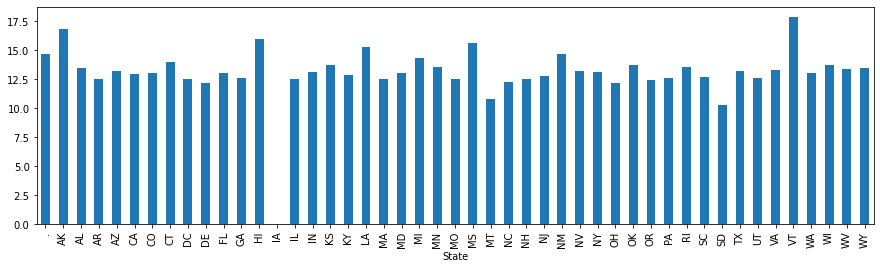

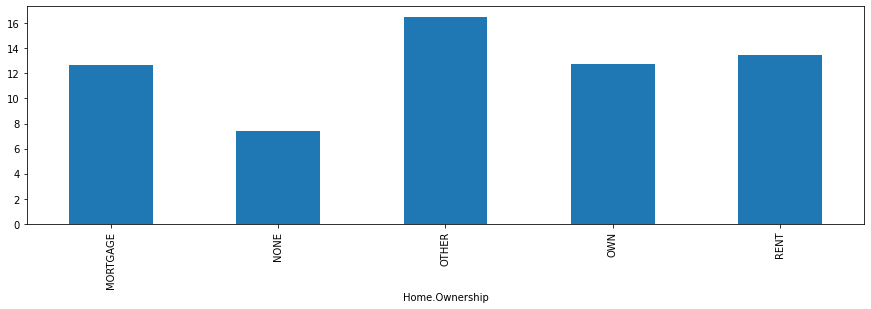

In [24]:
for col in obj_cols:
    plt.figure(figsize=(15, 4))
    df_train.groupby(col)['Interest.Rate'].mean().plot.bar()
    plt.show()

In [25]:
for col in obj_cols:
    print(df_train[col].isnull().sum())

1
1
1


In [26]:
for col in obj_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [27]:
for col in obj_cols:
    print(df_train[col].isnull().sum())

0
0
0


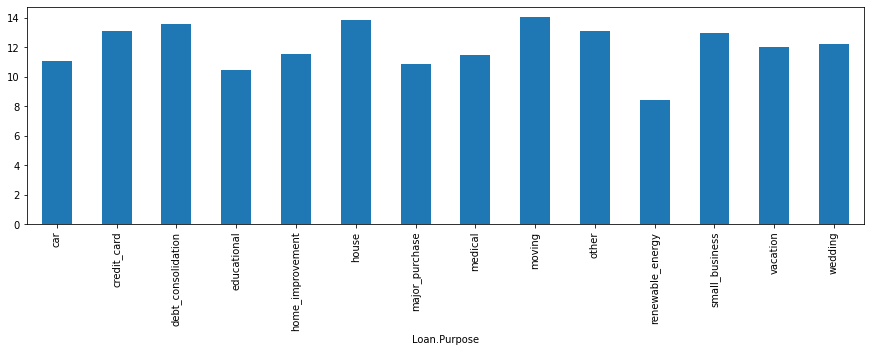

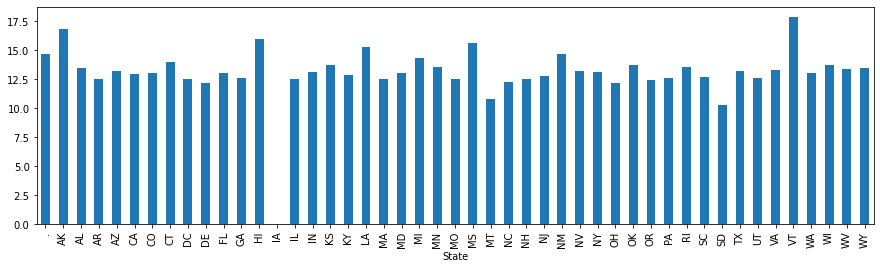

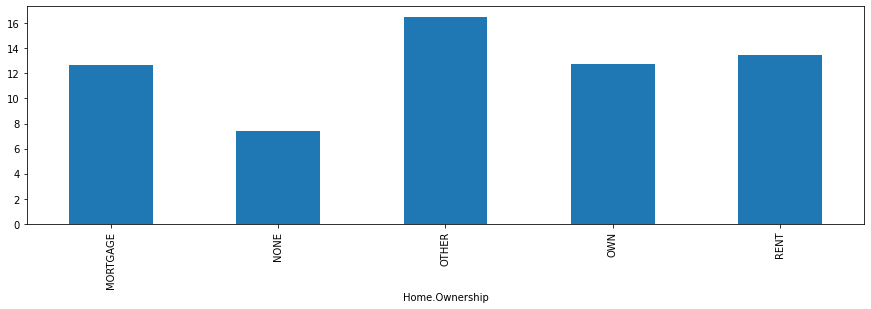

In [28]:
for col in obj_cols:
    plt.figure(figsize=(15, 4))
    df_train.groupby(col)['Interest.Rate'].mean().plot.bar()
    plt.show()

In [29]:
for col in obj_cols:
    print(df_train[col].value_counts())

debt_consolidation    1308
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64
CA    434
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
.       1
IA      1
Name: State, dtype: int64
MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Ho

In [30]:
df_train['Home.Ownership'] = np.where(df_train['Home.Ownership'].isin(df_train['Home.Ownership'].value_counts()[df_train['Home.Ownership'].value_counts()<10].index) | df_train['Home.Ownership'].isnull(), df_train['Home.Ownership'].mode()[0], df_train['Home.Ownership'])

In [31]:
df_train = pd.get_dummies(df_train, columns=['Home.Ownership'], drop_first=True)

In [32]:
loan_purpose_map = df_train['Loan.Purpose'].value_counts().to_dict()

In [33]:
loan_purpose_map

{'debt_consolidation': 1308,
 'credit_card': 444,
 'other': 200,
 'home_improvement': 152,
 'major_purchase': 101,
 'small_business': 87,
 'car': 50,
 'wedding': 39,
 'medical': 30,
 'moving': 29,
 'vacation': 21,
 'house': 20,
 'educational': 15,
 'renewable_energy': 4}

In [34]:
df_train['Loan.Purpose'] = df_train['Loan.Purpose'].map(loan_purpose_map)

In [35]:
df_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Home.Ownership_OWN,Home.Ownership_RENT
0,79542.0,25000.0,25000.00,18.49,1.0,1308,27.56,VA,8606.56,722,11.0,15210.0,3.0,5.0,0,0
1,75473.0,19750.0,19750.00,17.27,1.0,1308,13.39,NY,6737.50,712,14.0,19070.0,3.0,4.0,0,0
2,67265.0,2100.0,2100.00,14.33,0.0,101,3.50,LA,1000.00,692,13.0,893.0,1.0,0.0,1,0
3,80167.0,28000.0,28000.00,16.29,0.0,444,19.62,NV,7083.33,712,12.0,38194.0,1.0,10.0,0,0
4,17240.0,24250.0,17431.82,12.23,1.0,444,23.79,OH,5833.33,732,6.0,31061.0,2.0,10.0,0,0


<AxesSubplot:xlabel='State'>

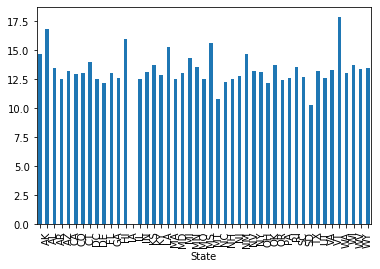

In [36]:
df_train.groupby('State')['Interest.Rate'].mean().plot.bar()

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [38]:
df_train['State'] = encoder.fit_transform(df_train['State'])

In [39]:
df_train.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                       float64
Loan.Purpose                        int64
Debt.To.Income.Ratio              float64
State                               int32
Monthly.Income                    float64
FICO.Range                          int32
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
Home.Ownership_OWN                  uint8
Home.Ownership_RENT                 uint8
dtype: object

In [40]:
df_train.drop('ID', axis=1, inplace=True)

In [41]:
# Missing Values

In [42]:
df_train.isnull().sum().sort_values(ascending=False)

Interest.Rate                     300
Employment.Length                  80
Open.CREDIT.Lines                   9
Amount.Requested                    5
Amount.Funded.By.Investors          5
Revolving.CREDIT.Balance            5
Monthly.Income                      3
Inquiries.in.the.Last.6.Months      3
Loan.Length                         2
Debt.To.Income.Ratio                1
Loan.Purpose                        0
State                               0
FICO.Range                          0
Home.Ownership_OWN                  0
Home.Ownership_RENT                 0
dtype: int64

In [43]:
for col in ['Loan.Length', 'Inquiries.in.the.Last.6.Months']:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [44]:
null_cols = df_train.columns[(df_train.isnull().sum()>0) & (df_train.isnull().sum()<10)]

In [45]:
null_cols

Index(['Amount.Requested', 'Amount.Funded.By.Investors',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance'],
      dtype='object')

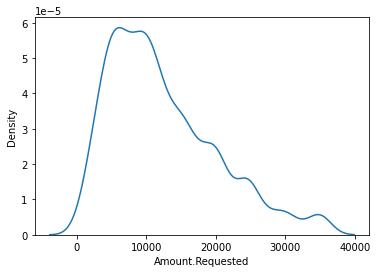

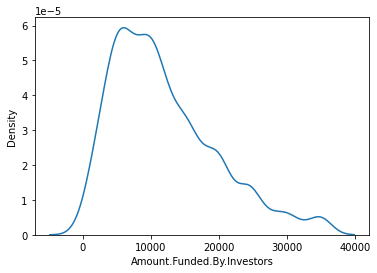

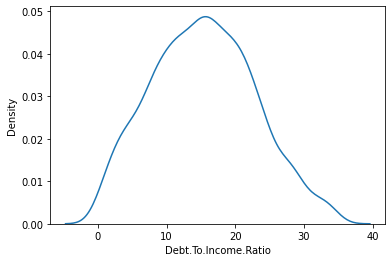

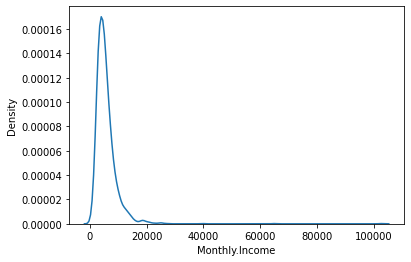

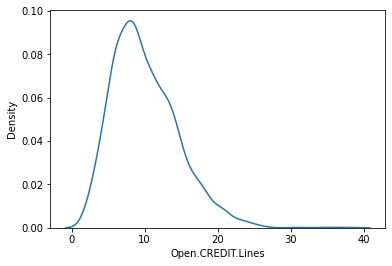

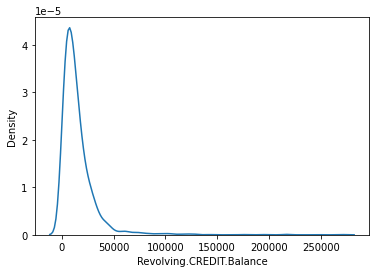

In [46]:
for col in null_cols:
    sns.kdeplot(df_train[col])
    plt.show()

In [47]:
for col in null_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [48]:
df_train.isnull().sum()

Amount.Requested                    0
Amount.Funded.By.Investors          0
Interest.Rate                     300
Loan.Length                         0
Loan.Purpose                        0
Debt.To.Income.Ratio                0
State                               0
Monthly.Income                      0
FICO.Range                          0
Open.CREDIT.Lines                   0
Revolving.CREDIT.Balance            0
Inquiries.in.the.Last.6.Months      0
Employment.Length                  80
Home.Ownership_OWN                  0
Home.Ownership_RENT                 0
dtype: int64

In [49]:
df_train['Employment.Length'].value_counts()

10.0    653
0.0     249
2.0     243
3.0     235
5.0     202
4.0     191
1.0     177
6.0     163
7.0     127
8.0     108
9.0      72
Name: Employment.Length, dtype: int64

In [50]:
df_train['Employment.Length.NaN'] = np.where(df_train['Employment.Length'].isnull(), 1, 0)

In [51]:
df_train['Employment.Length'].fillna(df_train['Employment.Length'].mode()[0], inplace=True)

In [52]:
num_cols = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Loan.Length', 'Debt.To.Income.Ratio',
            'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
           'Employment.Length']

In [53]:
# Outliers

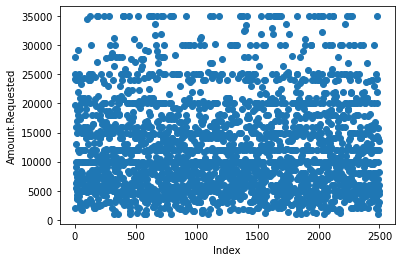

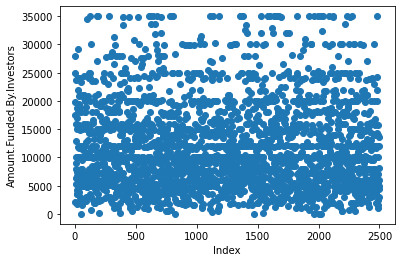

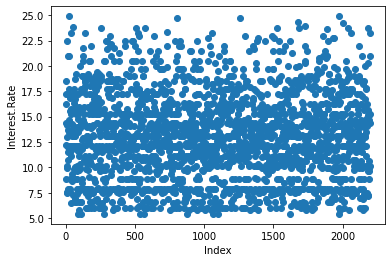

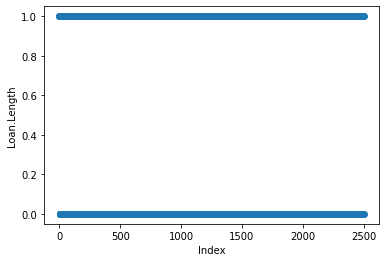

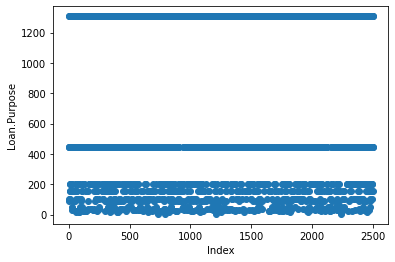

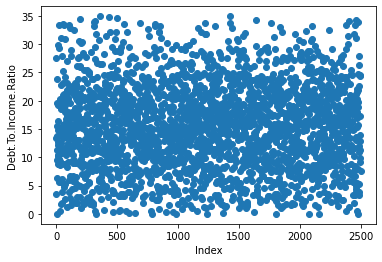

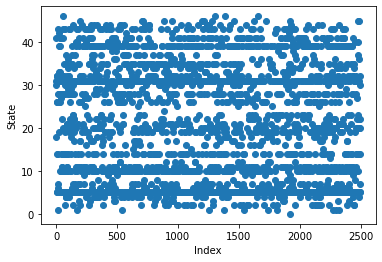

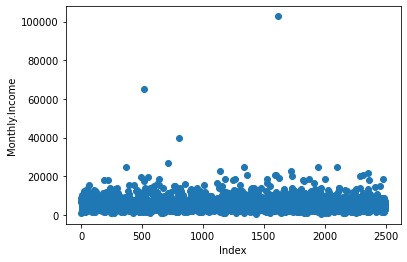

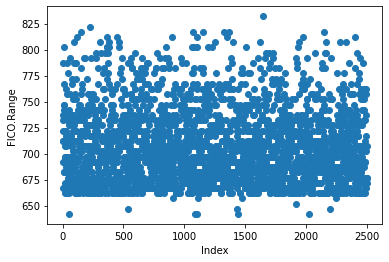

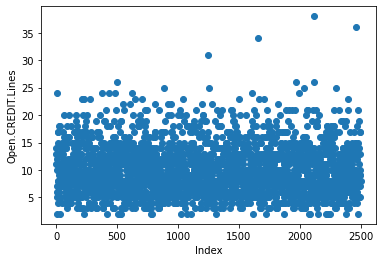

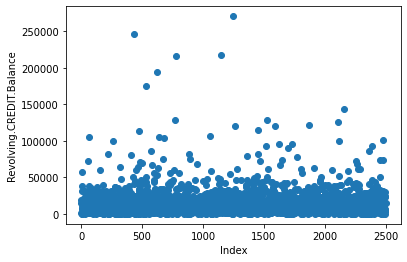

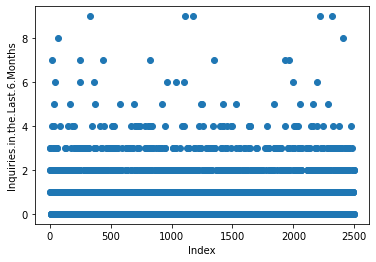

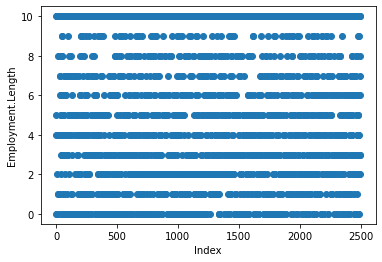

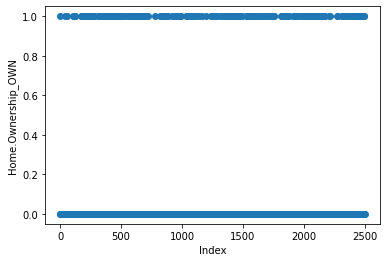

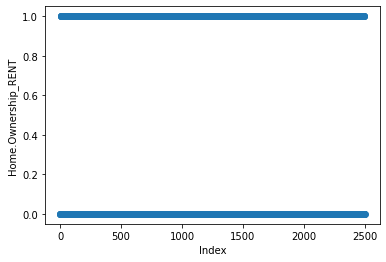

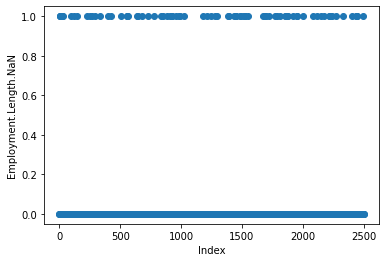

In [54]:
from importlib import reload
for col in df_train.columns:
    plt = reload(plt)
    plt.scatter(x=df_train[col].index, y=df_train[col],)
    plt.ylabel(col)
    plt.xlabel('Index')
    plt.show()

In [55]:
def cap_values(df_train, feature, capping_value):
    return np.where(df_train[feature]>capping_value, capping_value, df_train[feature])

capping_dict = {'Inquiries.in.the.Last.6.Months': 8, 'Open.CREDIT.Lines': 25, 'Revolving.CREDIT.Balance': 150000, 'Monthly.Income': 30000}


In [56]:
for index, val in capping_dict.items():
    df_train[index] = cap_values(df_train, index, val)

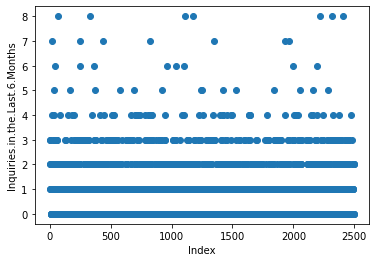

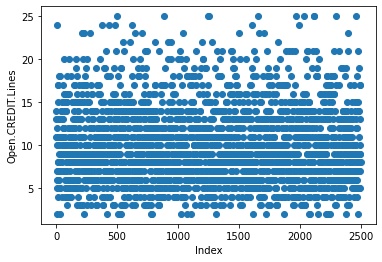

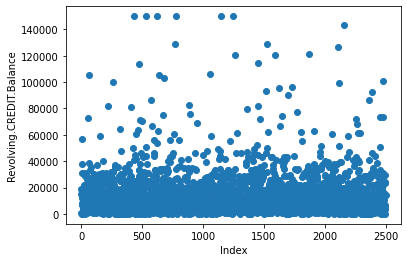

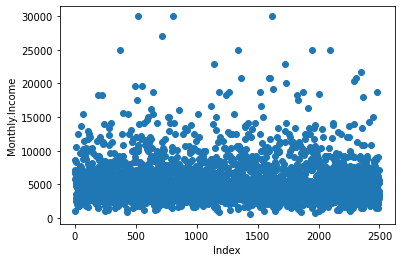

In [57]:
for col in capping_dict.keys():
    plt = reload(plt)
    plt.scatter(x=df_train[col].index, y=df_train[col],)
    plt.ylabel(col)
    plt.xlabel('Index')
    plt.show()

In [58]:
from scipy.stats import norm
from scipy import stats
import pylab

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


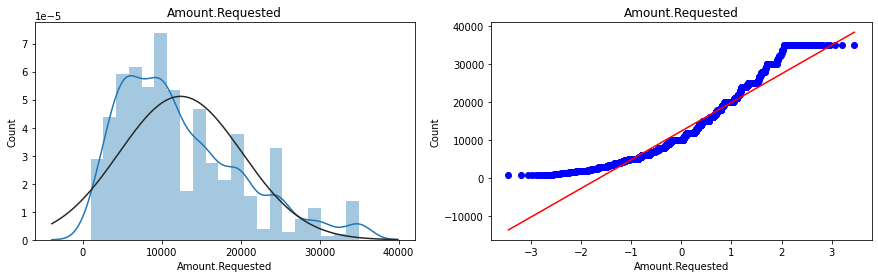

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


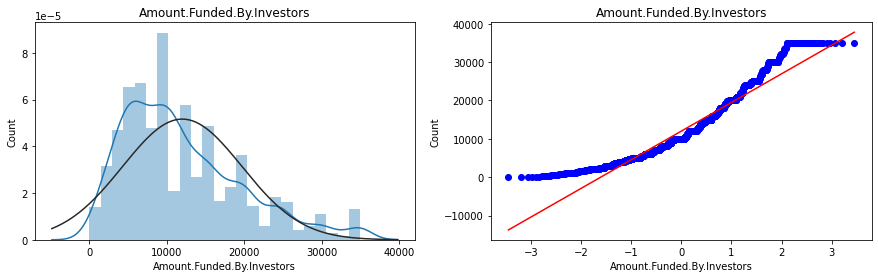

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


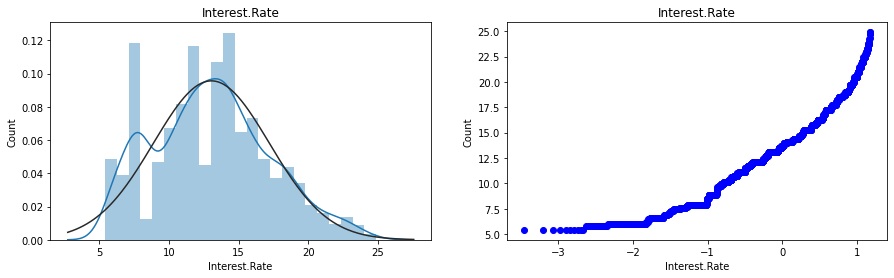

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


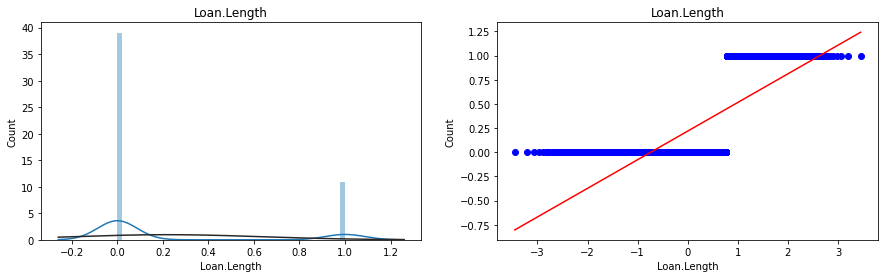

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


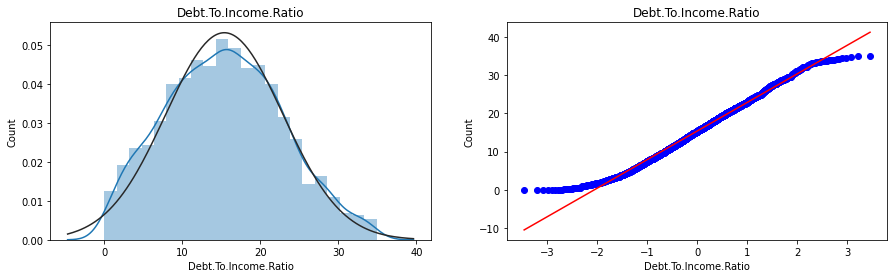

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


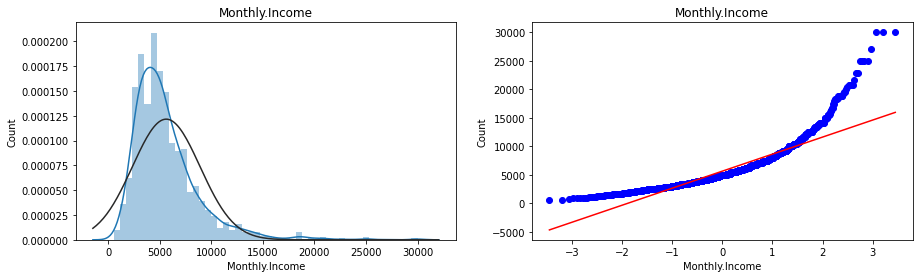

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


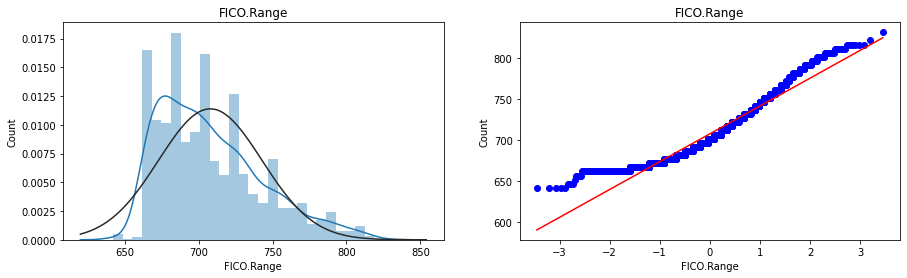

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


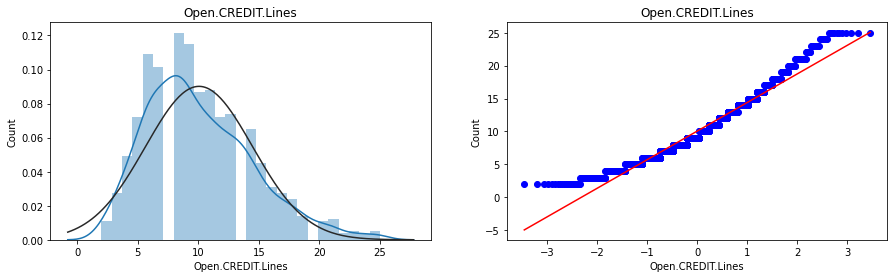

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


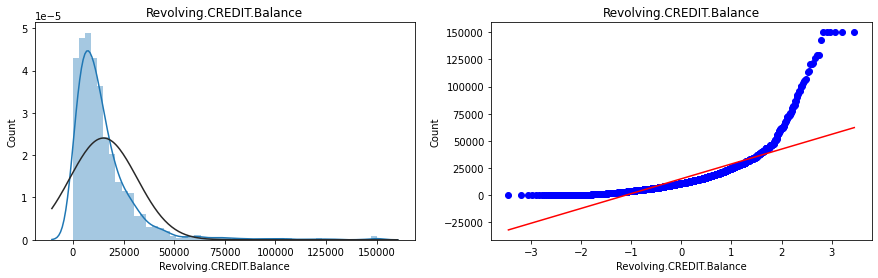

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


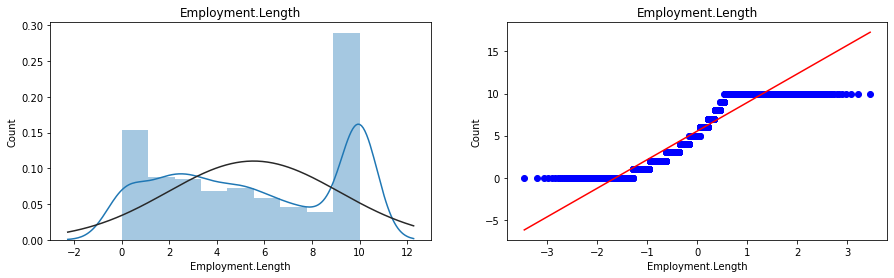

In [59]:
for col in num_cols:
    figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    ax1.set_title(col)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')
    sns.distplot(df_train[col], ax=ax1, fit=norm)
    stats.probplot(df_train[col], dist='norm', plot=ax2)
    ax2.set_ylabel('Count')
    ax2.set_title(col)
    ax2.set_xlabel(col)
    plt.show()

In [60]:
data = df_train.copy()
cols_to_transform=['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Debt.To.Income.Ratio', 'Monthly.Income', 
                  'FICO.Range', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance']

In [61]:
for col in cols_to_transform:
    data[col] = np.where(data[col]==0, 0, np.log1p(data[col]))

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


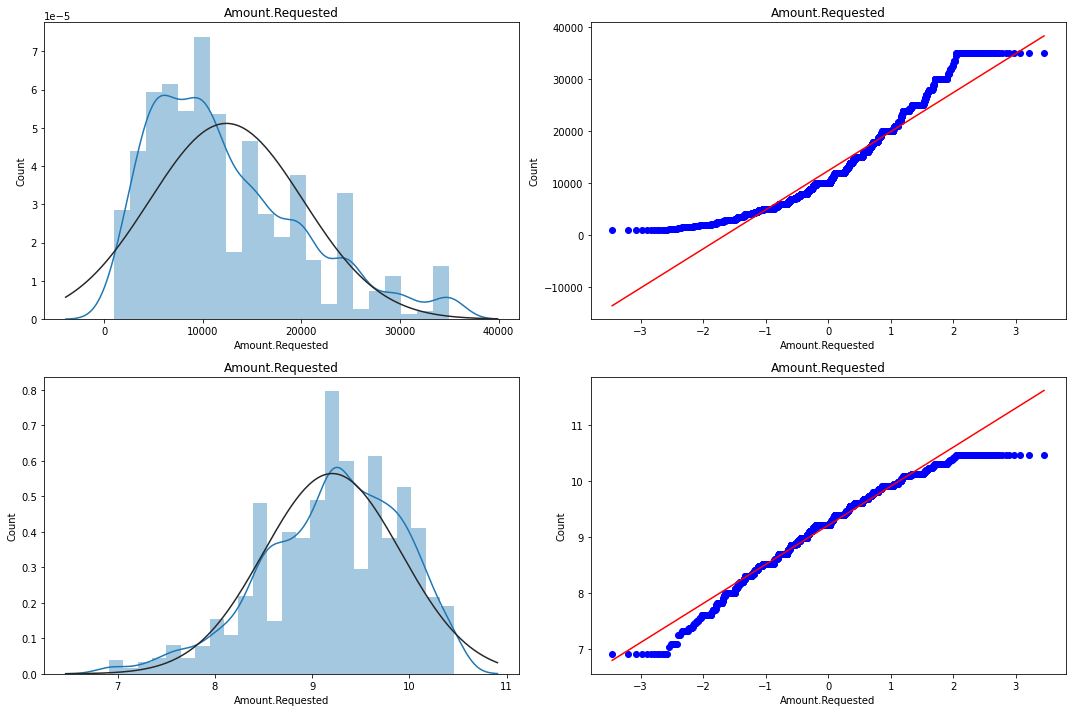

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


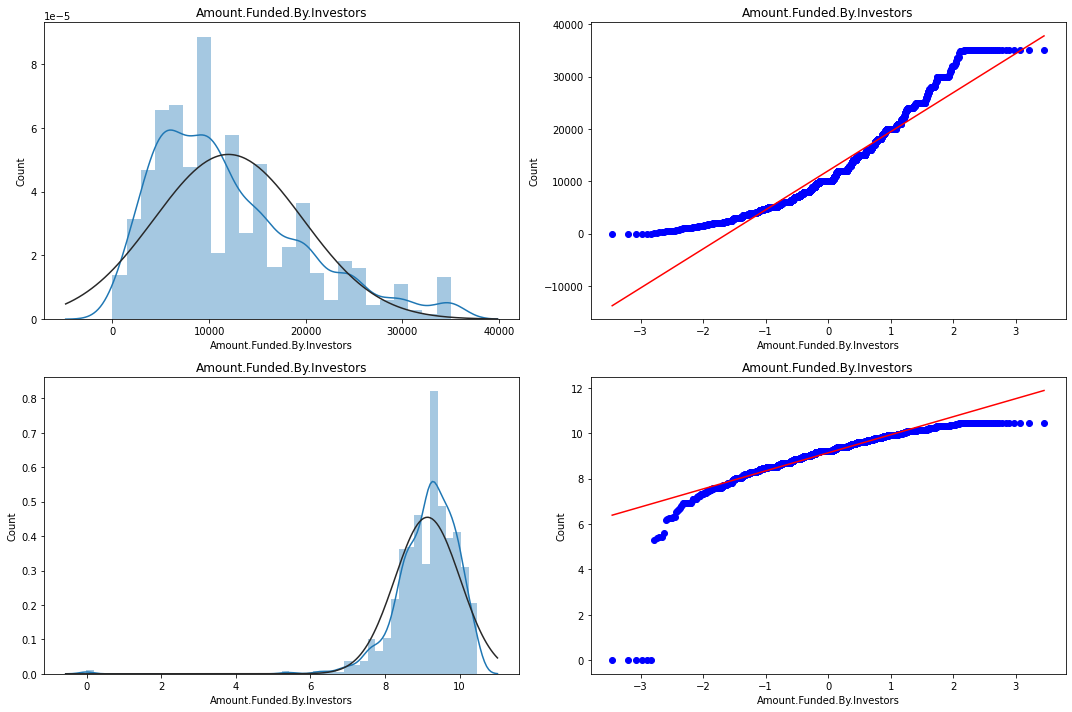

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


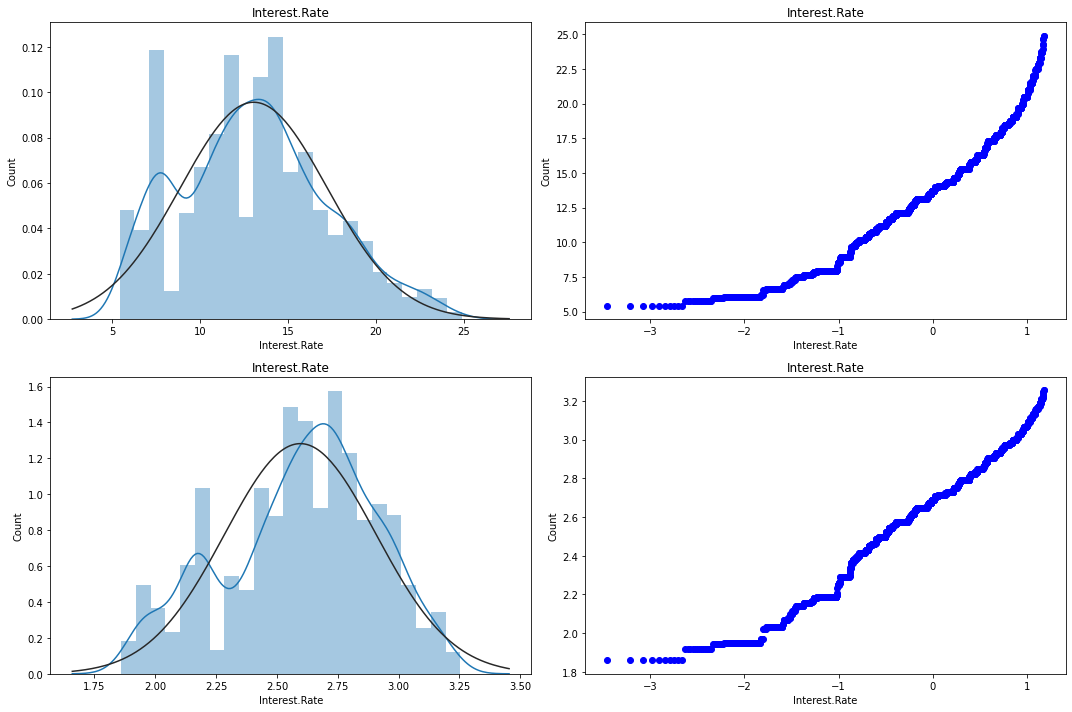

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


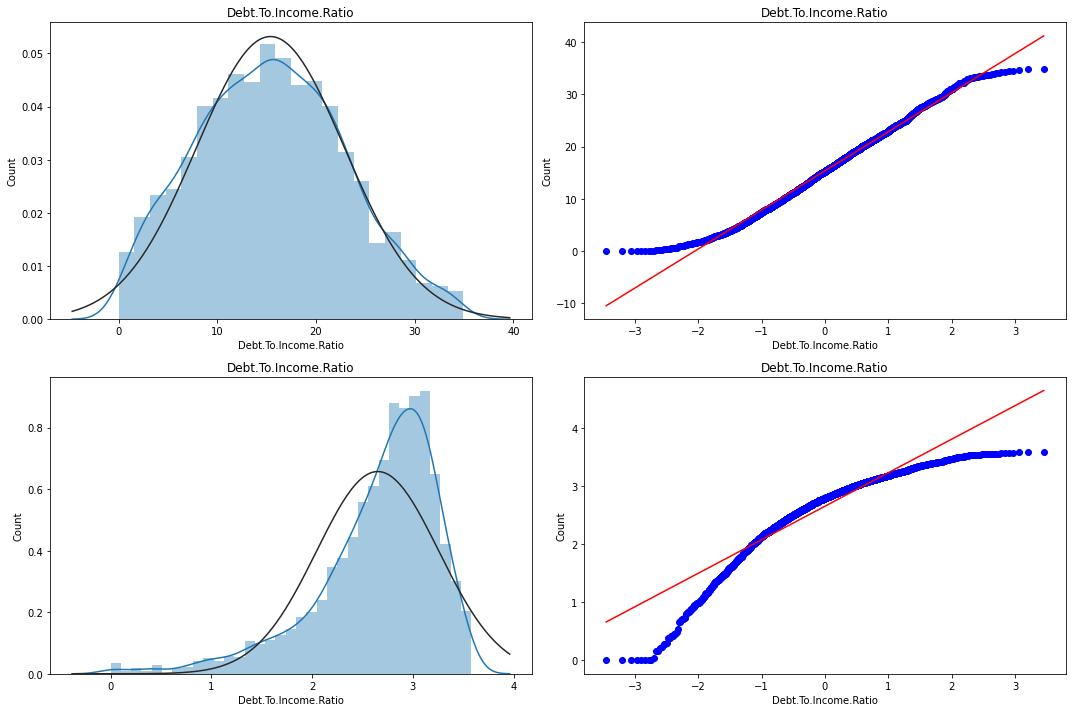

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


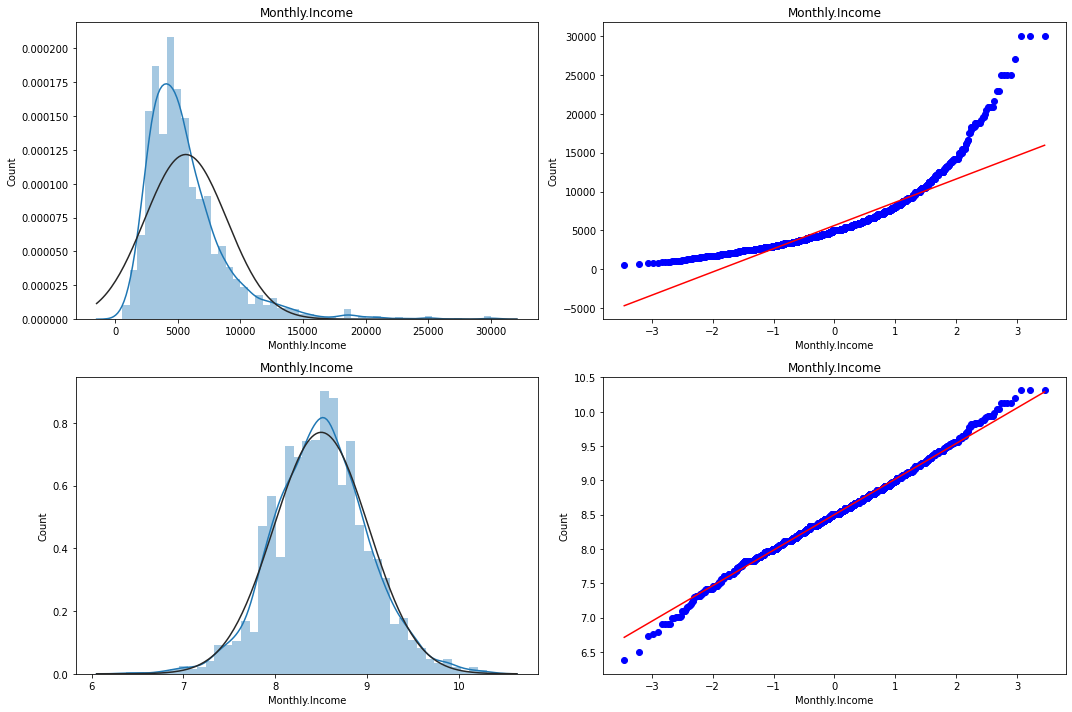

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


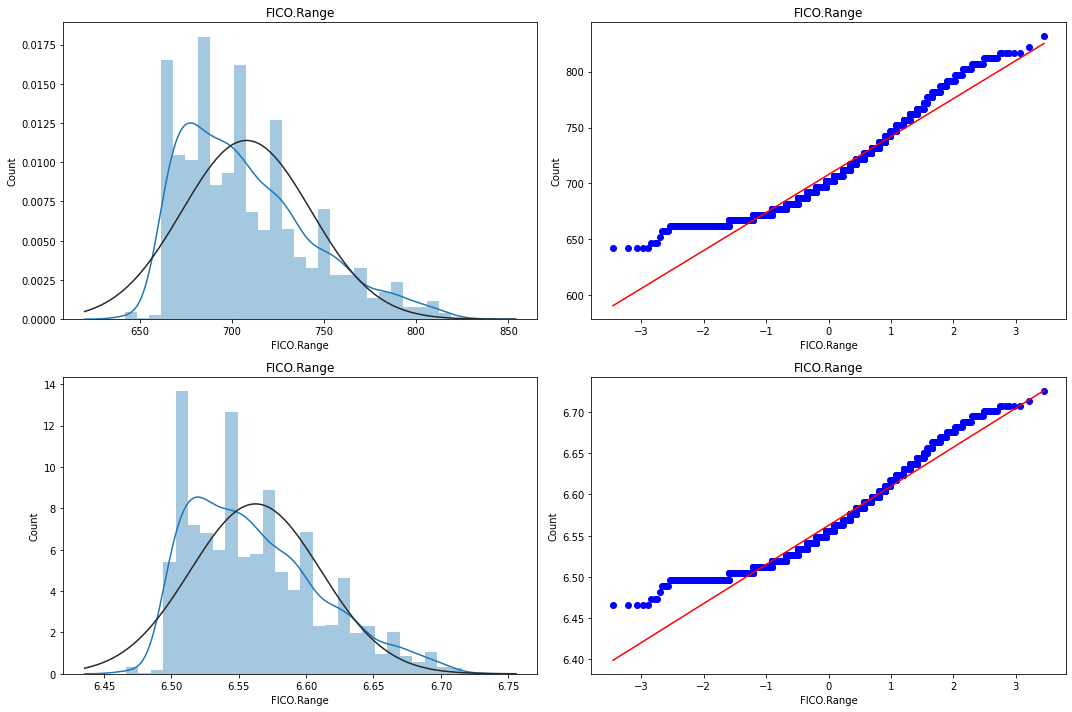

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


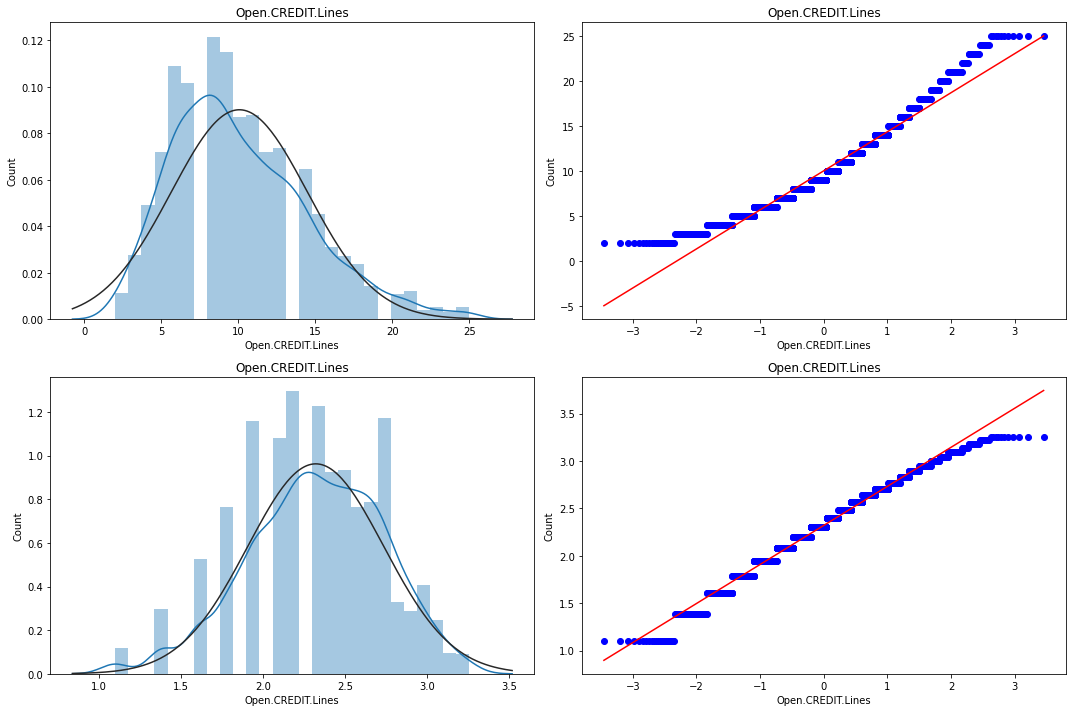

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


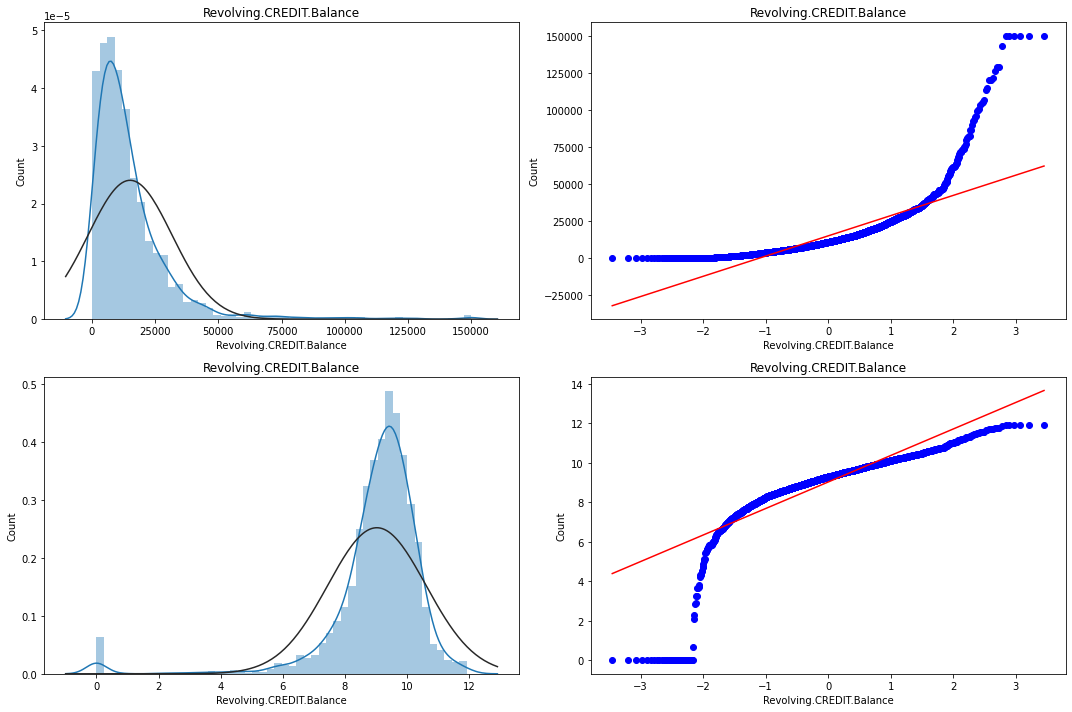

In [62]:
for col in cols_to_transform:
    figure, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].set_title(col)
    ax[0][0].set_xlabel(col)
    ax[0][0].set_ylabel('Count')
    sns.distplot(df_train[col], ax=ax[0][0], fit=norm)
    stats.probplot(df_train[col], dist='norm', plot=ax[0][1])
    ax[0][1].set_ylabel('Count')
    ax[0][1].set_title(col)
    ax[0][1].set_xlabel(col)
    ax[1][0].set_title(col)
    ax[1][0].set_xlabel(col)
    ax[1][0].set_ylabel('Count')
    sns.distplot(data[col], ax=ax[1][0], fit=norm)
    stats.probplot(data[col], dist='norm', plot=ax[1][1])
    ax[1][1].set_ylabel('Count')
    ax[1][1].set_title(col)
    ax[1][1].set_xlabel(col)
    plt.tight_layout()
    plt.show()

In [63]:
df_train[df_train['Amount.Funded.By.Investors']==0]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Home.Ownership_OWN,Home.Ownership_RENT,Employment.Length.NaN
47,5000.0,0.0,8.63,0.0,1308,1.92,28,2600.0,732,13.0,814.0,0.0,8.0,0,1,0
1474,3600.0,0.0,13.24,0.0,200,9.14,33,6290.0,657,7.0,3453.0,0.0,0.0,0,1,0
1966,7500.0,0.0,11.03,0.0,444,11.41,2,3750.0,687,15.0,5148.0,7.0,6.0,0,0,0
2005,4000.0,0.0,7.68,0.0,200,10.74,11,3417.0,792,11.0,2775.0,3.0,1.0,0,1,0


In [64]:
cols_to_transform=['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Monthly.Income', 
                  'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance']

In [65]:
for col in cols_to_transform:
    df_train[col] = np.where(df_train[col]==0, 0, df_train[col])

<AxesSubplot:>

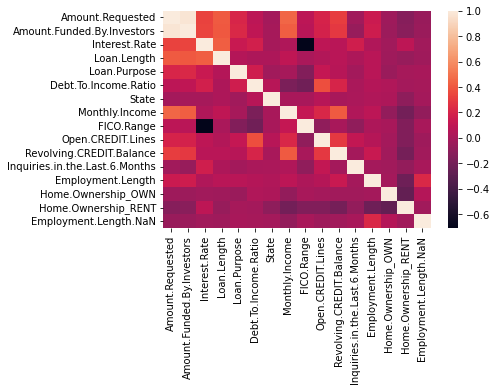

In [66]:
sns.heatmap(df_train.corr())

In [67]:
df_train.drop('Amount.Funded.By.Investors', axis=1, inplace=True)

In [68]:
df_train.shape

(2500, 15)

In [69]:
df_train.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Home.Ownership_OWN,Home.Ownership_RENT,Employment.Length.NaN
0,25000.0,18.49,1.0,1308,27.56,41,8606.56,722,11.0,15210.0,3.0,5.0,0,0,0
1,19750.0,17.27,1.0,1308,13.39,31,6737.50,712,14.0,19070.0,3.0,4.0,0,0,0
2,2100.0,14.33,0.0,101,3.50,18,1000.00,692,13.0,893.0,1.0,0.0,1,0,0
3,28000.0,16.29,0.0,444,19.62,30,7083.33,712,12.0,38194.0,1.0,10.0,0,0,0
4,24250.0,12.23,1.0,444,23.79,32,5833.33,732,6.0,31061.0,2.0,10.0,0,0,0


In [70]:
df_train[df_train['Interest.Rate'].isnull()].drop('Interest.Rate', axis=1).to_csv('data/test_preprocessed.csv')

In [71]:
df_train[~df_train['Interest.Rate'].isnull()].to_csv('data/train_preprocessed.csv')